In [35]:
df2 = pd.read_excel('Excel_sample_2.xlsx', sheet_name= 'Phishing_URL')

In [36]:
df2.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [37]:
df2['type'].value_counts()

type
benign        1903
defacement     477
phishing       135
malware         69
Name: count, dtype: int64

In [38]:
df2['length'] = ''
df2['length'] = df2['url'].apply(lambda x: len(x))

In [39]:
df2.head()

,url,type,length
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
import re

In [131]:
df2 = pd.read_excel('Excel_sample_2.xlsx', sheet_name= 'Phishing_URL')

In [132]:
df2.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [133]:
df2['type'].value_counts()

type
benign        1903
defacement     477
phishing       135
malware         69
Name: count, dtype: int64

In [134]:
df2['length'] = ''
df2['length'] = df2['url'].apply(lambda x: len(x))

In [135]:
df2.head()

,url,type,length
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235


In [136]:
df2.describe()

,length
count,2584.000000
mean,59.489938
std,39.368425
min,7.000000
25%,32.000000
50%,50.000000
75%,79.000000
max,379.000000


In [137]:
df2.shape[0]

2584

In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     2584 non-null   object
 1   type    2584 non-null   object
 2   length  2584 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 60.7+ KB


In [139]:
df2.head()

,url,type,length
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235


In [140]:
df2.columns

Index(['url', 'type', 'length'], dtype='object')

In [141]:
df2['symbols'] = df2['url'].apply(lambda x: len(re.findall(r'\W', x)))

In [142]:
df2.head()

,url,type,length,symbols
0,br-icloud.com.br,phishing,16,3
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,16
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,13


In [143]:
df2['slashes'] = df2['url'].apply(lambda x: x.count('/'))

In [144]:
df2.head()

,url,type,length,symbols,slashes
0,br-icloud.com.br,phishing,16,3,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,5,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,16,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,13,3


In [145]:
df2['digits'] = df2['url'].apply(lambda x: sum(c.isdigit() for c in x))

In [146]:
df2.head()

,url,type,length,symbols,slashes,digits
0,br-icloud.com.br,phishing,16,3,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4,2,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,5,3,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,16,3,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,13,3,22


In [147]:
df2['letters'] = df2['url'].apply(lambda x: sum(c.isalpha() for c in x))

In [148]:
df2.head()

,url,type,length,symbols,slashes,digits,letters
0,br-icloud.com.br,phishing,16,3,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4,2,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,5,3,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,16,3,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,13,3,22,199


In [149]:
df2['com'] = df2['url'].apply(lambda x: 'com' in x).astype(int)

In [150]:
df2.head()

,url,type,length,symbols,slashes,digits,letters,com
0,br-icloud.com.br,phishing,16,3,0,0,13,1
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4,2,1,29,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,5,3,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,16,3,7,63,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,13,3,22,199,1


In [151]:
df2.columns

Index(['url', 'type', 'length', 'symbols', 'slashes', 'digits', 'letters',
       'com'],
      dtype='object')

In [152]:
%matplotlib inline

/Users/yachu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


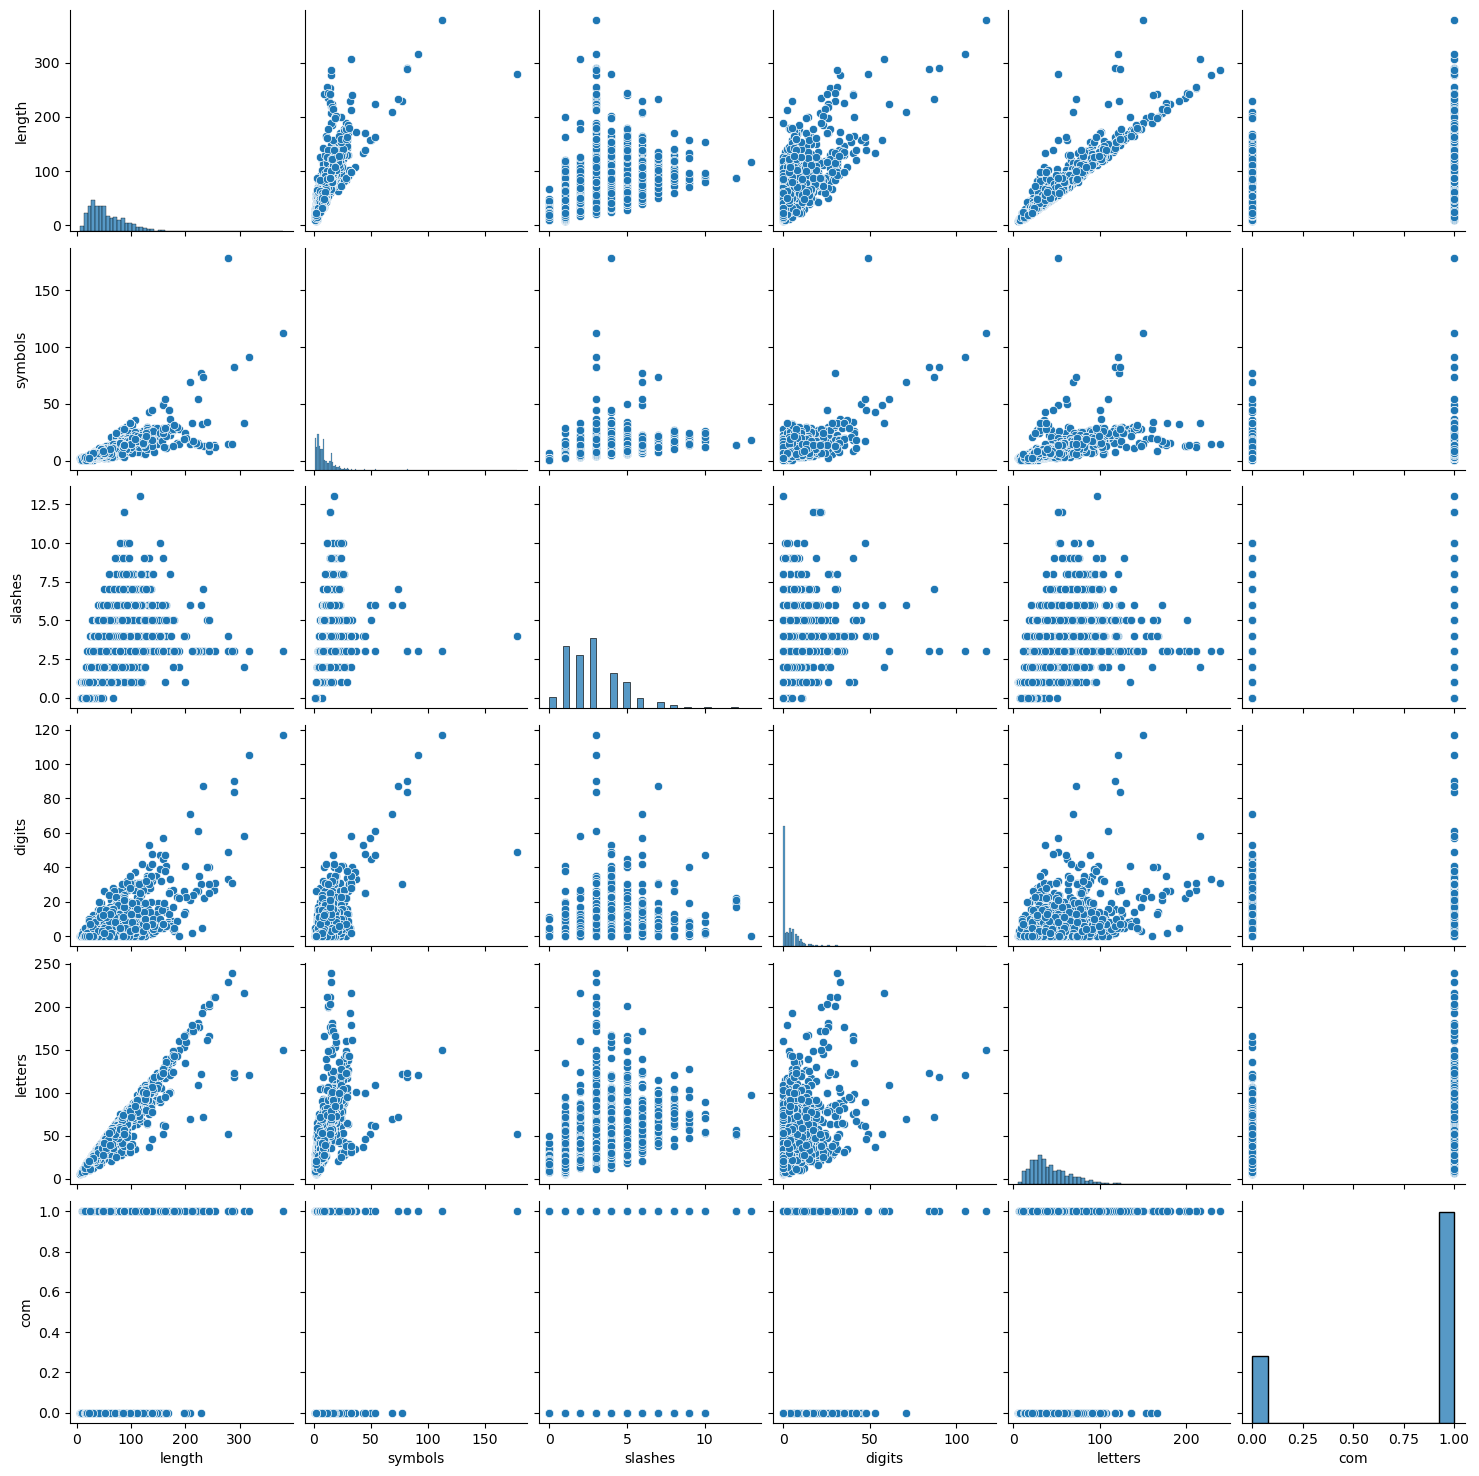

In [153]:
sea.pairplot(df2)

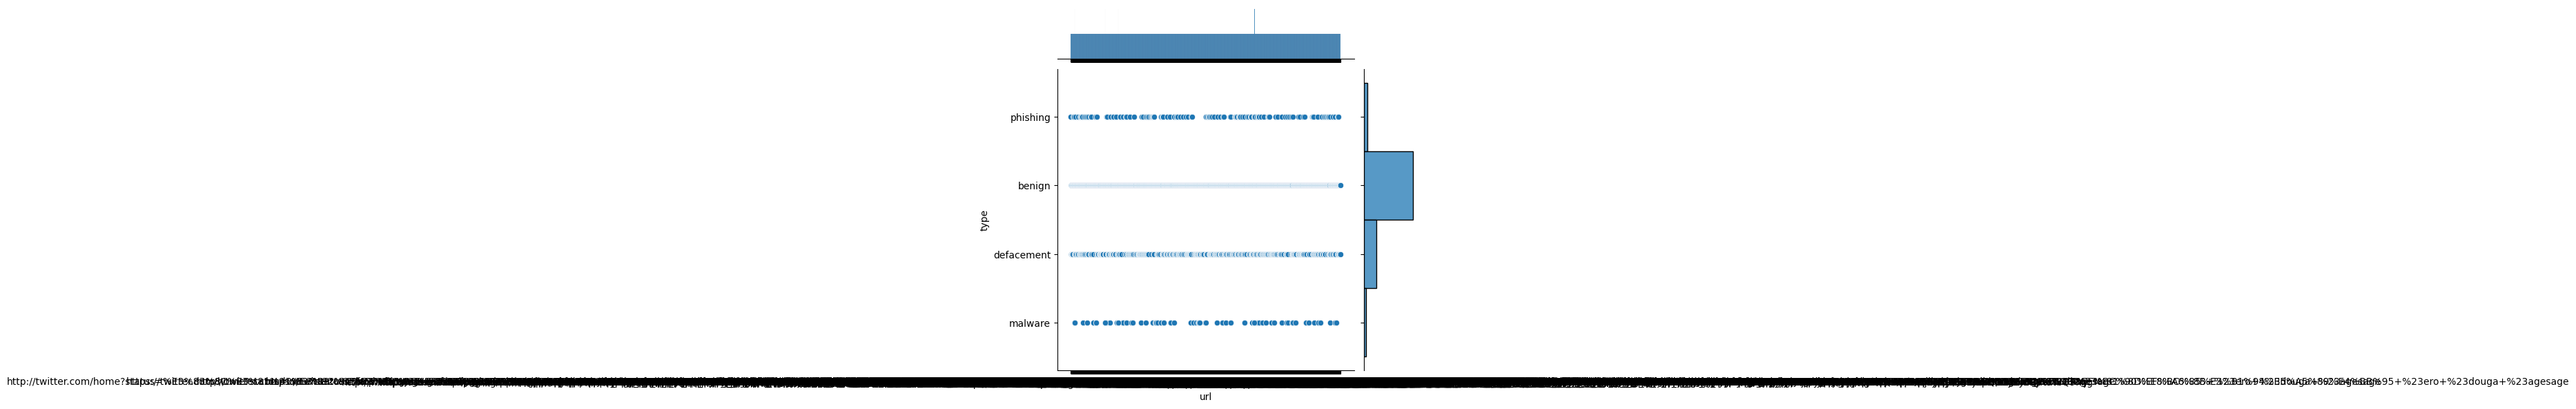

In [154]:
sea.jointplot(x = 'url', y = 'type', data = df2, kind = 'scatter')

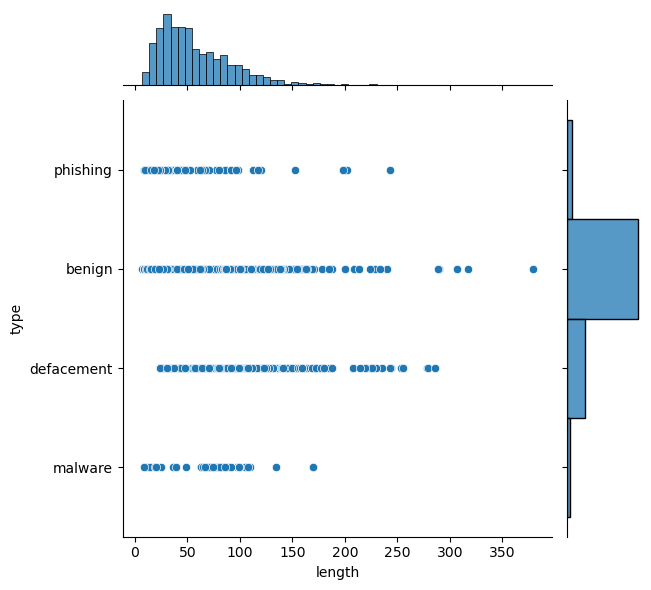

In [155]:
sea.jointplot(x = 'length', y = 'type', data = df2, kind = 'scatter')

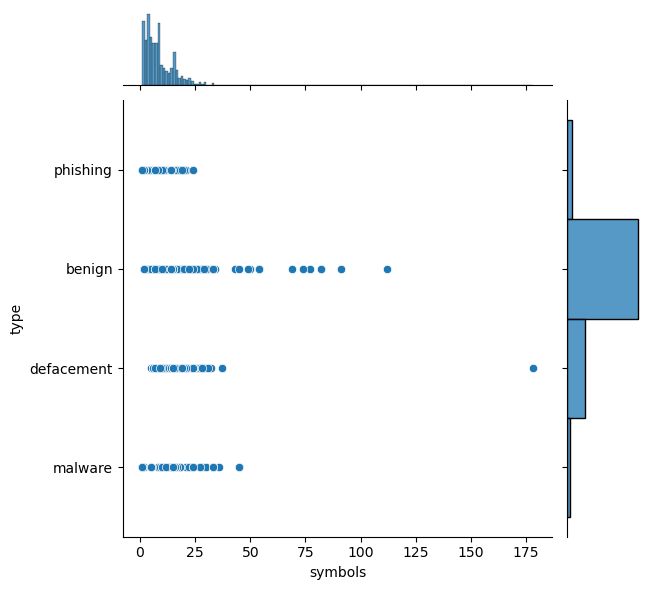

In [156]:
sea.jointplot(x = 'symbols', y = 'type', data = df2, kind = 'scatter')

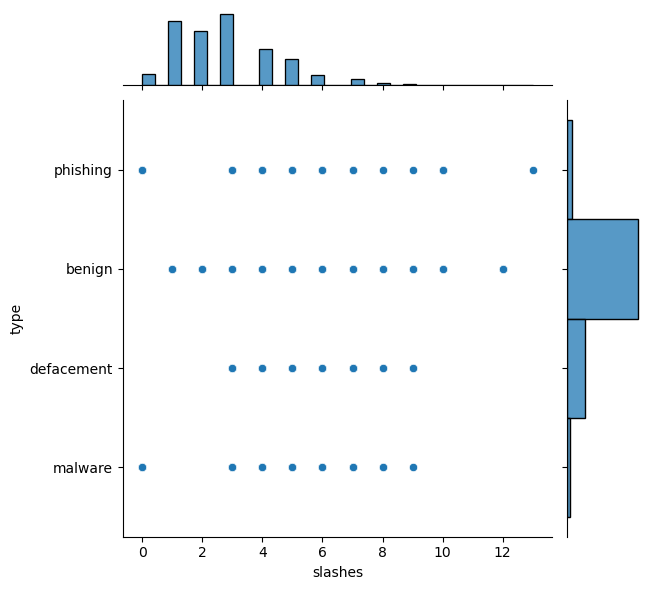

In [157]:
sea.jointplot(x = 'slashes', y = 'type', data = df2, kind = 'scatter')

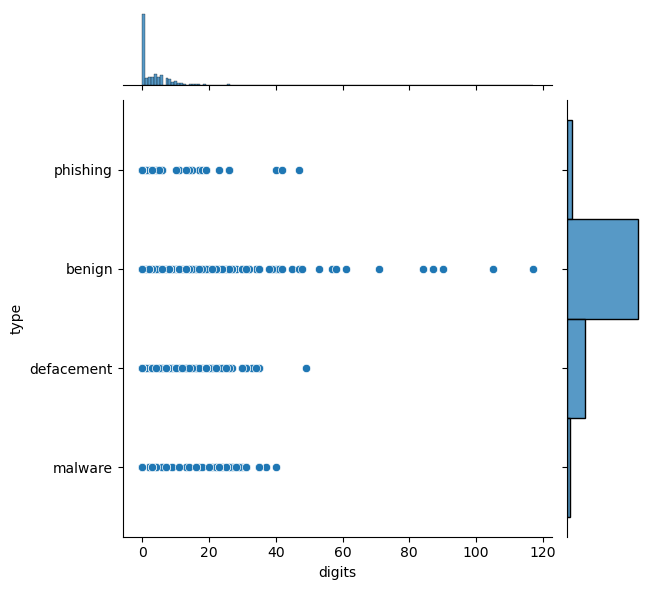

In [158]:
sea.jointplot(x = 'digits', y = 'type', data = df2, kind = 'scatter')

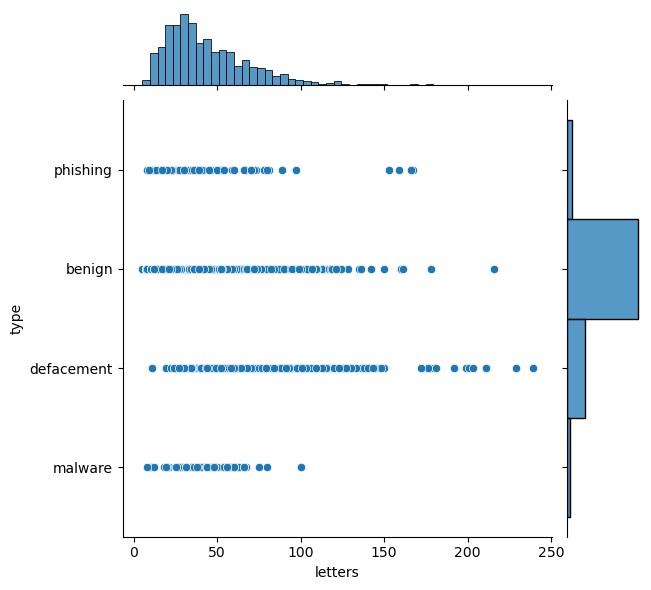

In [159]:
sea.jointplot(x = 'letters', y = 'type', data = df2, kind = 'scatter')

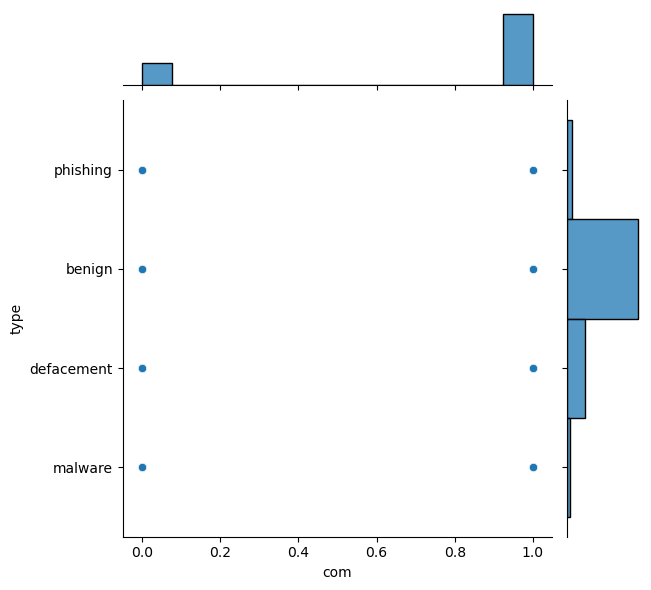

In [160]:
sea.jointplot(x = 'com', y = 'type', data = df2, kind = 'scatter')

<Axes: xlabel='com', ylabel='type'>

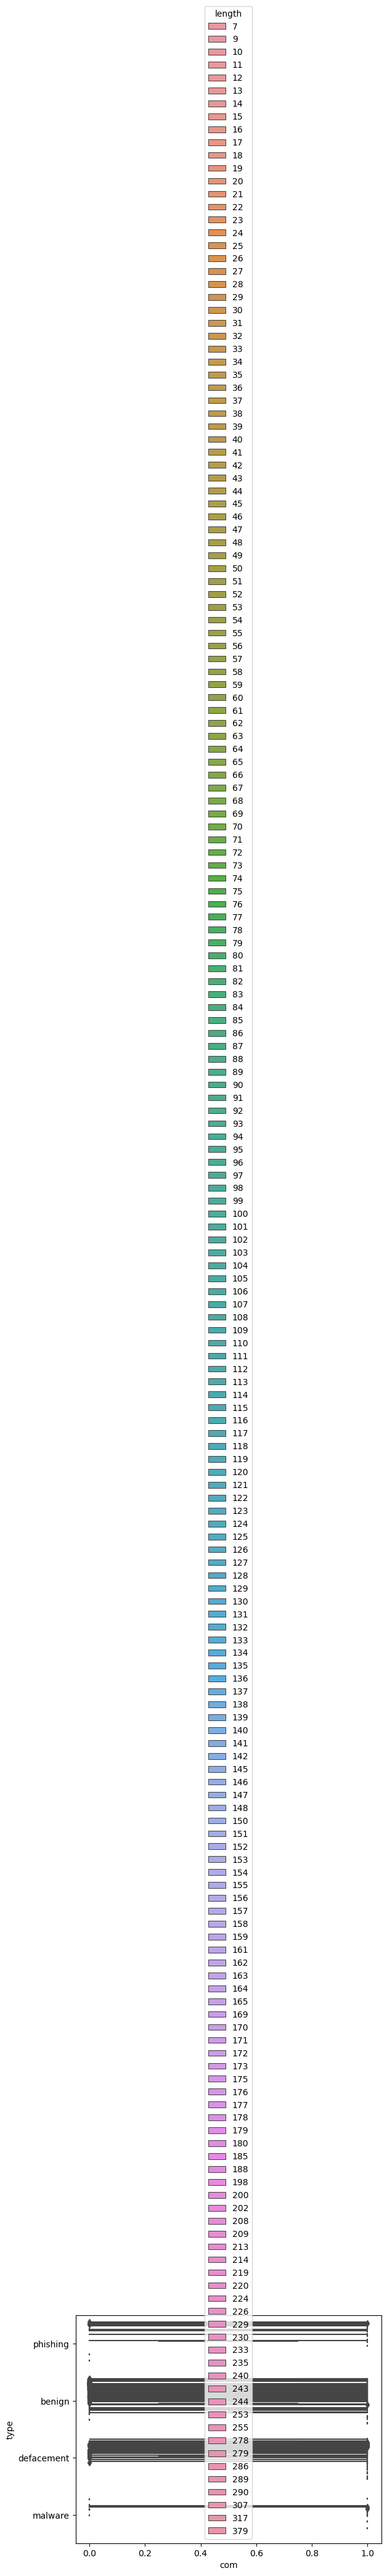

In [161]:
sea.boxplot(x = 'com', y = 'type', hue = 'length', data = df2)

In [162]:
df2.head()

,url,type,length,symbols,slashes,digits,letters,com
0,br-icloud.com.br,phishing,16,3,0,0,13,1
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4,2,1,29,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,5,3,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,16,3,7,63,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,13,3,22,199,1


In [163]:
df2_url = pd.get_dummies(df2['url'], prefix = 'url')

In [164]:
df2_url.head()

,url_10starmovies.com/Watch-Movies-Online/Jackie_Bouvier_Kennedy_Onassis_2000/,url_123people.ca/s/david+murray,url_123people.ca/s/georges+arsenault,url_123people.com/z/carl+musgrove,url_192.com/atoz/business/dunoon-pa23/libraries/argyll-bute-library-headquarters/713fe8219666d2446f6d62c97f0a431aaadd241e/ml/,url_192.com/atoz/people/gerrard/steven/,url_192.com/atoz/people/oakley/patrick/,url_192.com/atoz/people/watkins/daniel/,url_1972topps.blogspot.com/2009/03/77-ron-theobald.html,url_2.statcan.ca/census-recensement/2006/dp-pd/prof/92-595/p2c.cfm?TPL=INDX&LANG=E,...,url_youtube.com/watch?v=vt8vA1v3hyo,url_youtube.com/watch?v=z1gSHMJJBx0,url_youtube.com/watch?v=zItj3x_FcA8,url_zeitgeist-photo.com/galleries/2008_colors_of_the_world_collection/,url_zillow.com/homedetails/708-Leonards-Way-Argusville-ND-58005/2127949117_zpid/,url_zimbio.com/Marshon+Brooks,url_zimbio.com/Shemar+Moore+Wife,url_zimmeril.com/site.asp?site_id=25,url_zoominfo.com/people/Dauphin_Claude_1101070491.aspx,url_zoominfo.com/people/Villapiano_Phil_152501629.aspx
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
df2_new = pd.concat([df2, df2_url], axis = 1)

In [166]:
df2_new.head()

,url,type,length,symbols,slashes,digits,letters,com,url_10starmovies.com/Watch-Movies-Online/Jackie_Bouvier_Kennedy_Onassis_2000/,url_123people.ca/s/david+murray,...,url_youtube.com/watch?v=vt8vA1v3hyo,url_youtube.com/watch?v=z1gSHMJJBx0,url_youtube.com/watch?v=zItj3x_FcA8,url_zeitgeist-photo.com/galleries/2008_colors_of_the_world_collection/,url_zillow.com/homedetails/708-Leonards-Way-Argusville-ND-58005/2127949117_zpid/,url_zimbio.com/Marshon+Brooks,url_zimbio.com/Shemar+Moore+Wife,url_zimmeril.com/site.asp?site_id=25,url_zoominfo.com/people/Dauphin_Claude_1101070491.aspx,url_zoominfo.com/people/Villapiano_Phil_152501629.aspx
0,br-icloud.com.br,phishing,16,3,0,0,13,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,mp3raid.com/music/krizz_kaliko.html,benign,35,4,2,1,29,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,5,3,1,25,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,16,3,7,63,1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,13,3,22,199,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [167]:
X = df2_new.drop(['url'], axis = 1)

In [168]:
X.head()

,type,length,symbols,slashes,digits,letters,com,url_10starmovies.com/Watch-Movies-Online/Jackie_Bouvier_Kennedy_Onassis_2000/,url_123people.ca/s/david+murray,url_123people.ca/s/georges+arsenault,...,url_youtube.com/watch?v=vt8vA1v3hyo,url_youtube.com/watch?v=z1gSHMJJBx0,url_youtube.com/watch?v=zItj3x_FcA8,url_zeitgeist-photo.com/galleries/2008_colors_of_the_world_collection/,url_zillow.com/homedetails/708-Leonards-Way-Argusville-ND-58005/2127949117_zpid/,url_zimbio.com/Marshon+Brooks,url_zimbio.com/Shemar+Moore+Wife,url_zimmeril.com/site.asp?site_id=25,url_zoominfo.com/people/Dauphin_Claude_1101070491.aspx,url_zoominfo.com/people/Villapiano_Phil_152501629.aspx
0,phishing,16,3,0,0,13,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,benign,35,4,2,1,29,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,benign,31,5,3,1,25,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,defacement,88,16,3,7,63,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,defacement,235,13,3,22,199,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [169]:
X = df2_new.drop(['type','url'], axis = 1)

In [170]:
X.head()

,length,symbols,slashes,digits,letters,com,url_10starmovies.com/Watch-Movies-Online/Jackie_Bouvier_Kennedy_Onassis_2000/,url_123people.ca/s/david+murray,url_123people.ca/s/georges+arsenault,url_123people.com/z/carl+musgrove,...,url_youtube.com/watch?v=vt8vA1v3hyo,url_youtube.com/watch?v=z1gSHMJJBx0,url_youtube.com/watch?v=zItj3x_FcA8,url_zeitgeist-photo.com/galleries/2008_colors_of_the_world_collection/,url_zillow.com/homedetails/708-Leonards-Way-Argusville-ND-58005/2127949117_zpid/,url_zimbio.com/Marshon+Brooks,url_zimbio.com/Shemar+Moore+Wife,url_zimmeril.com/site.asp?site_id=25,url_zoominfo.com/people/Dauphin_Claude_1101070491.aspx,url_zoominfo.com/people/Villapiano_Phil_152501629.aspx
0,16,3,0,0,13,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,35,4,2,1,29,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,31,5,3,1,25,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,88,16,3,7,63,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,235,13,3,22,199,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [171]:
y = df2['type']

In [172]:
y.head()

0      phishing
1        benign
2        benign
3    defacement
4    defacement
Name: type, dtype: object

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=101)

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
logistic_model = LogisticRegression()

In [176]:
logistic_model.fit(X_train, y_train)

/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
y_logistic_prediction = logistic_model.predict(X_test)

In [178]:
from sklearn.metrics import classification_report

In [179]:
classification_report(y_test, y_logistic_prediction)

/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n      benign       0.77      0.94      0.85       378\n  defacement       0.49      0.24      0.32        91\n     malware       0.40      0.24      0.30        17\n    phishing       0.00      0.00      0.00        31\n\n    accuracy                           0.74       517\n   macro avg       0.41      0.35      0.37       517\nweighted avg       0.66      0.74      0.68       517\n'

In [180]:
print(classification_report(y_test, y_logistic_prediction))

              precision    recall  f1-score   support

      benign       0.77      0.94      0.85       378
  defacement       0.49      0.24      0.32        91
     malware       0.40      0.24      0.30        17
    phishing       0.00      0.00      0.00        31

    accuracy                           0.74       517
   macro avg       0.41      0.35      0.37       517
weighted avg       0.66      0.74      0.68       517



/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
from sklearn.metrics import confusion_matrix

In [182]:
confusion_matrix(y_test, y_logistic_prediction)

array([[355,  19,   4,   0],
       [ 67,  22,   2,   0],
       [ 11,   2,   4,   0],
       [ 29,   2,   0,   0]])

In [183]:
from sklearn.svm import SVC

In [184]:
svm_model = SVC()

In [185]:
svm_model.fit(X_train, y_train)

SVC()

In [186]:
y_svm_prediction = svm_model.predict(X_test)

In [187]:
print(classification_report(y_test, y_svm_prediction))

              precision    recall  f1-score   support

      benign       0.75      0.99      0.85       378
  defacement       0.58      0.08      0.14        91
     malware       1.00      0.24      0.38        17
    phishing       0.00      0.00      0.00        31

    accuracy                           0.74       517
   macro avg       0.58      0.33      0.34       517
weighted avg       0.68      0.74      0.66       517



/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
confusion_matrix(y_test, y_svm_prediction)

array([[374,   4,   0,   0],
       [ 84,   7,   0,   0],
       [ 13,   0,   4,   0],
       [ 30,   1,   0,   0]])

In [189]:
from sklearn import tree